# K-Nearest-Neighbors

In [248]:
import pandas as pd

df = pd.read_csv("houses_clean.csv")

data = df.copy()
data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,CentralAir,SalePrice
0,0.380070,0.375,0.333333,0.500,1,208500
1,-0.312090,0.375,0.333333,0.875,1,181500
2,0.497489,0.375,0.333333,0.500,1,223500
3,0.390885,0.375,0.333333,0.500,1,140000
4,1.134029,0.500,0.333333,0.500,1,250000


In [249]:
data.shape

(1460, 6)

ℹ️ The features are already preprocessed as you did it during the Data preparation day. The dataset description can be found [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Houses_dataset_description.txt).

# Default KNN

🎯 The task is to predict the price of houses (`SalePrice`) with all the features.

👇 Use cross validation to evaluate a default KNNRegressor on such a task. What is the proportion of the variance in `SalePrice` that is explained by the features? Save your answer under variable name `base_knn_score`.

In [250]:
data.columns

Index(['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond',
       'CentralAir', 'SalePrice'],
      dtype='object')

In [251]:
features = data.columns.tolist()
features.remove('SalePrice')
features

['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'CentralAir']

<details>
<summary> 💡 Hint </summary>
    <br>
    ℹ️ The proportion of the variance in the dependent variable that is explained by the independent variables is the R2 score.
</details>

In [252]:
from sklearn.neighbors import KNeighborsRegressor
# Prepare X and y

y = data['SalePrice'] # target

X = data.drop(columns = 'SalePrice') #data[features] # features

neigh = KNeighborsRegressor()
neigh.fit(X, y)

#Baseline score
base_knn_score = neigh.score(X, y) # Score model
print("base_knn_score ", base_knn_score )


print( " ########     ######### ")
print('Score of K-NN Regressor : {:.2f}'
     .format(neigh.score(X, y)))
print( " ########     #########  ")

base_knn_score  0.7445011601676972
 ########     ######### 
Score of K-NN Regressor : 0.74
 ########     #########  


# Scale sensitivity : Rescaling data

KNNs and distance based algorithms can be extremely sensitive to the scale of the features. 

👇 Rescale the feature set within an **exact common range**, and save it under a variable named `X_rescaled`. Then, evaluate a model on the rescaled features and save its score under variable name `rescaled_score`.

<details>
<summary> 💡 Hint </summary>
    
`MinMaxScaler()`

</details>




In [253]:
features

['GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'OverallCond', 'CentralAir']

In [254]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#X = data.drop(columns = 'SalePrice') #data[features] # features

scaler = MinMaxScaler() # Instanciate MinMaxScaler
scaler.fit(X)
X_rescaled = scaler.transform(X)

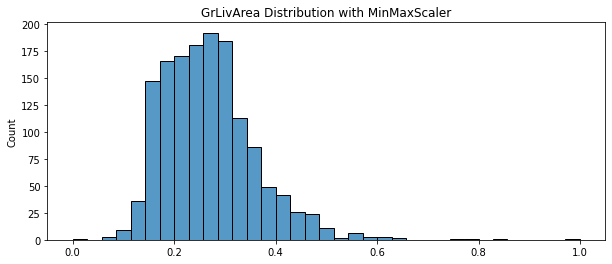

In [255]:
plt.figure(figsize = (10, 4))
sns.histplot(X_rescaled[:, 0], kde = False, bins = 35); # kde : density estimation

plt.title("GrLivArea Distribution with MinMaxScaler");

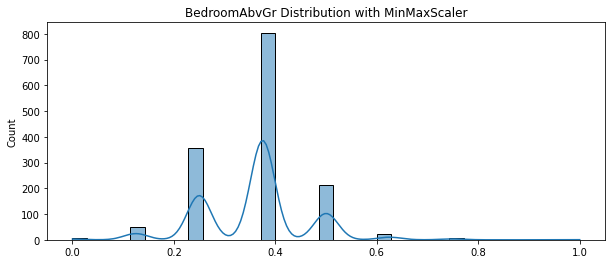

In [256]:
plt.figure(figsize = (10, 4))
sns.histplot(X_rescaled[:, 1], kde = True, bins = 35); # kde : density estimation

plt.title("BedroomAbvGr Distribution with MinMaxScaler");

In [257]:
from sklearn.neighbors import KNeighborsRegressor
# Prepare X and y
# X_rescaled ---> features
#y = data['SalePrice'] # target

neigh = KNeighborsRegressor()
neigh.fit(X_rescaled, y)

# rescaled baseline score
rescaled_score = neigh.score(X_rescaled, y) # Score model
print( "rescaled_score : ", rescaled_score )

print( " ########     ######### ")
print('Scaled Score of K-NN Regressor : {:.2f}'
     .format(neigh.score(X_rescaled, y)))
print( " ########     #########  ")

rescaled_score :  0.7711595107345011
 ########     ######### 
Scaled Score of K-NN Regressor : 0.77
 ########     #########  


👉 The R2 score should have increased!

# Optimizing $k$

👇 Fine tune the parameter K of a KNNRegressor on the rescaled features. Plot the evolution of the score as K increases from 2 until 25.

In [59]:
from sklearn.model_selection import cross_val_score

scores = []

# X_rescaled ---> features
#y = data['SalePrice'] # target

for k in range(2, 26):
    neigh = KNeighborsRegressor(n_neighbors = k)
    #cross_val_score(neigh, X_rescaled, y, cv=5).mean()
    scores.append( cross_val_score(neigh, X_rescaled, y, cv=5).mean() )

In [62]:
scores[:3] # len(scores) = 24 

[0.6236926810559009, 0.6352616637719477, 0.6422019244504337]

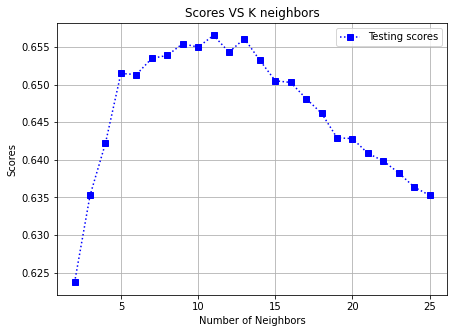

In [70]:
plt.figure(figsize=[7, 5])
#plt.plot(range(2, 26), scores, label="Testing scores")
plt.plot(range(2, 26), scores, label="Testing scores", c="blue", ls=':', marker='s')

plt.title("Scores VS K neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Scores")

plt.legend(loc="best")
#plt.grid(axis="y", linewidth=0.5)
plt.grid()
plt.show();

❓ Which value of K produces the best performance? Save your answer under variable name `best_k`.

In [17]:
best_k = 11 # By looking at your graph, you should see that the score stops increasing around K = 10.

❓ What is you interpretation of the poor performance of the model for values $k$ < 5?

**When K is too small, the model will tend to overfit to the training set**. It will focus on too few points to be able to generalize well. Increasing K will give the model more examples to base its predictions on.

# Overfitting a KNN - Learning curves

ℹ️ When the parameter K of KNNs is too small, there is a risk of overfitting the training set and not being able to generalize well. 

👇 Plot the learning curves of a KNN with parameter K=2.

In [71]:
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = [25,50,75,100,250,500,750,1000,1150]
k = 2

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors = k), 
    X=X_rescaled, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

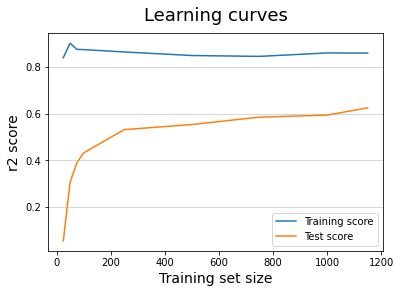

In [72]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend(loc="best")
plt.grid(axis="y", linewidth=0.5)

👉 You should observe a high training score, but a low testing score. ⚠️ Overfitting alert ⚠️ This is due to a parameter K that is too low.

# Ideal K

👇 This time, plot the learning curves for the ideal K value you found in the "Optimizing $k$" section.

In [73]:
train_sizes = [25,50,75,100,250,500,750,1000,1150]
k = 11

# Get train scores (R2), train sizes, and validation scores using `learning_curve`
train_sizes, train_scores, test_scores = learning_curve(
    estimator=KNeighborsRegressor(n_neighbors = k), 
    X=X_rescaled, y=y, train_sizes=train_sizes, cv=5)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

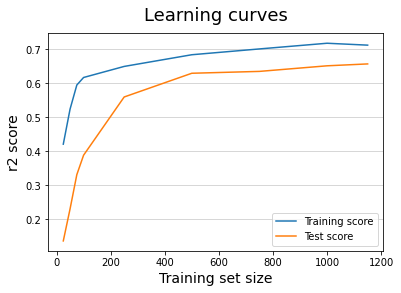

In [74]:
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend(loc="best")
plt.grid(axis="y", linewidth=0.5)

👉 The curves should be close to converging, which indicates that the model is overfitting less and generalizing better.

ℹ️ **There are two key elements to remember when modelling with KNN models:**

1. Distance algorithms are extremely sensitive to the **scale of features**
2. **K must be tuned**: it controls the tradeoff between performance, generalization, and **overfitting**

# KNN model Predict

❓ What is the average difference between actual price and predicted price of the optimized KNN model? Compute your answer and save it under variable name `price_error`

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(
     X_rescaled, y, test_size=0.3 )

knn = KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

train_preds = knn.predict(X_test)

price_error= mean_absolute_error(y_test, train_preds)  # equiv to : (abs(y_test-train_preds)).mean()

print("price_error :", price_error)


print( " ########     ######### ")
print('price_error : {:.2f}'
     .format(price_error))
print( " ########     #########  ")

price_error : 29871.969696969696
 ########     ######### 
price_error : 29871.97
 ########     #########  


# Model Selection : KNN model VS.  Linear Regression

❓ Which of those two models would you chose to perform the task of predicting house prices:
- The KNN model you just tuned
- A Linear Regression model

Save your answer as a string under variable name `best_model` as either "KNN" or "LinearReg".

**Make sure you are comparing the same metrics!!**

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Instanciate model
model = LinearRegression()

# Train the model on the data
model.fit(X_rescaled, y)

# 5-Fold Cross validate model
cv_results = cross_validate(model, X_rescaled, y, scoring = 'neg_mean_absolute_error') # Cross validate\n",
# return_train_score=True if we need training scores
# cv=5, default 5-fold cross validation

score_linreg = cv_results['test_score'].mean() # Mean of scores
score_linreg

-33586.16906310637

## ******  ******* N.B  ******  *******

In [92]:
# 5-Fold Cross validate model
cv_results = cross_validate(model, X_rescaled, y, 
                            scoring=('r2', 'neg_mean_absolute_error')) # Cross validate\n",
# return_train_score=True if we need training scores


In [93]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_neg_mean_absolute_error', 'test_r2']

In [94]:
cv_results['test_neg_mean_absolute_error'].mean(), cv_results['test_r2'].mean()

(-33586.16906310637, 0.5944790982110585)

In [95]:
# price_error = 31121.511623080114
# score_linreg = -33586.16906310637   abs(score_linreg) > price_error
# we need to minimize the error ---> KNN is the best model

ℹ️ When comparing either metric of both models, the KNN model should outperform the Linear Regression. This could be due to its ability to capture non-linear patterns in the data.

In [96]:
best_model = 'KNN'

# More codes !

## Predicting one array

In [107]:
new_data = X_rescaled[1459, :]

In [180]:
[y[1459]]

[147500]

In [143]:
 ((new_data).reshape(1, -1))[0].tolist() 

[0.2227538543328017, 0.375, 0.3333333333333333, 0.625, 1.0]

In [187]:
new_pred = knn.predict([
                            ((new_data).reshape(1, -1))[0].tolist()    ])

# ((new_data).reshape(1, -1))[0].tolist()  ---> [0.2227538543328017, 0.375, 0.3333333333333333, 0.625, 1.0]

new_error = mean_absolute_error( [y[1459]] , [new_pred[0]] )
round(new_pred[0], 2), round(y[1459], 2),  round(new_error, 2)

(147213.64, 147500, 286.36)

# IRIS DATA

## KNN classifier

In [383]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
#traitement du fichier csv
df = pd.read_csv('iris.csv')
a = df.loc[:,"petal_length"]
b = df.loc[:,"petal_width"]
X = list(zip(a, b))  # -------> Here, len(x), x[0] = (150, (1.4, 0.2))
y = df.loc[:,"species"] # target
#fractionner dataset (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#instanciation et définition du k
knn = KNeighborsClassifier(n_neighbors = 3) # on peut spécifier la distance : (... , metric = 'euclidean')
#training
knn.fit(X_train, y_train)
#calcule de précision
print("score: ", knn.score(X_test, y_test))
#Prédiction
longueur = 2.5
largeur = 0.75
prediction = knn.predict([[longueur, largeur]])
print("prédiction: ", prediction)

#affichage des résultats
resultat = "Résultat : " + prediction[0]
print(resultat)


print( " ########     ######### ")
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print( " ########     #########  ")

score:  0.9777777777777777
prédiction:  ['setosa']
Résultat : setosa
 ########     ######### 
Accuracy of K-NN classifier on training set: 0.99
Accuracy of K-NN classifier on test set: 0.98
 ########     #########  


### classification_report, confusion_matrix

In [384]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [385]:
y_pred = knn.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[16  0  0]
 [ 0 18  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [386]:
["Predict '" + f"{x}'" for x in list(y.unique())]

["Predict 'setosa'", "Predict 'versicolor'", "Predict 'virginica'"]

In [414]:
Ind = ["Predict '" + f"{x}'" for x in list(y.unique())]
confusion_DataFrame = pd.DataFrame(confusion_matrix,
             index=  list(y.unique()) ,  #['setosa', 'versicolor', 'virginica'] 
            columns=   Ind )

confusion_DataFrame

,Predict 'setosa',Predict 'versicolor',Predict 'virginica'
setosa,16,0,0
versicolor,0,18,0
virginica,0,1,10


In [415]:
#sns.heatmap(confusion_matrix(y_test, pred), annot=True)
#plt.show()

len(y_test) = 45, which corresponds to the total values in the confusion matrix.

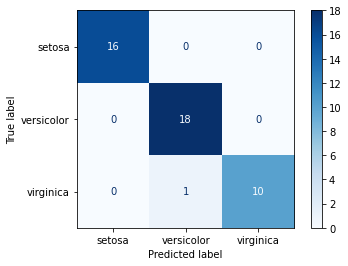

In [431]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=list(y.unique()),
                                 cmap=plt.cm.Blues
                                 )

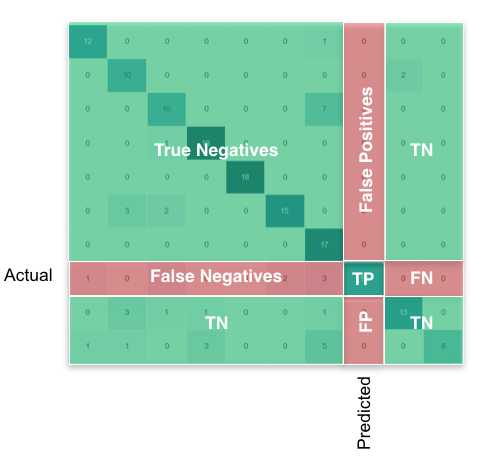

Statistical measures:

* **True Positive (TP)** equivalent to a hit. The test correctly concludes the presence of an effect.

* **True Negative (TN).** The test correctly concludes the absence of an effect.

* **False Positive (FP)** equivalent to a false alarm, Type I error. The test improperly concludes the presence of an effect. Thresholding at 𝑝-value < 0.05 leads to .. FP.

* **False Negative (FN)** equivalent to a miss, Type II error. The test improperly concludes the absence of an effect.

### Classification metrics Using sklearn

In [417]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = y_test
#y_pred = knn.predict(X_test)

print('Accuracy =', round(accuracy_score(y_true, y_pred), 2)) # Accuracy
print(" *** *** ***    ***      *** *** ***")
string = ['macro', 'weighted']
for s in string:
    print('Precision ' + s + ' =', round(precision_score(y_true, y_pred, average= s), 2)) # Precision
    print('Recall ' + s + ' =', round(recall_score(y_true, y_pred, average= s), 2)) # Recall
    print('F1 score ' + s + ' =', round(f1_score(y_true, y_pred, average= s), 2)) # F1 score
    print(" *** *** ***    ***      *** *** ***")

Accuracy = 0.98
 *** *** ***    ***      *** *** ***
Precision macro = 0.98
Recall macro = 0.97
F1 score macro = 0.98
 *** *** ***    ***      *** *** ***
Precision weighted = 0.98
Recall weighted = 0.98
F1 score weighted = 0.98
 *** *** ***    ***      *** *** ***


### Classification metrics , built-in functions

In [418]:
def accuracy(TP, FP, TN, FN):
    correct = TP + TN
    total = TP + TN + FP + FN 
    return correct / total

print("accuracy : ", accuracy(70, 4930, 981070, 13930)) 

def precision(TP, FP, TN, FN):
    return TP / (TP + FP)

print("precision  : ", precision(70, 4930, 981070, 13930))  

def recall(TP, FP, TN, FN):
    return TP / (TP + FN)

print("recall : ", recall(70, 4930, 981070, 13930) ) 

def f1_score(TP, FP, TN, FN):
    p = precision(TP, FP, TN, FN)
    r = recall(TP, FP, TN, FN)
    return 2 * p * r / (p + r)

print("f1_score : ", f1_score(70, 4930, 981070, 13930) ) 

accuracy :  0.98114
precision  :  0.014
recall :  0.005
f1_score :  0.00736842105263158


**For class Versicolor (2th)**

In [430]:
# For class Versicolor (2th)
TP = confusion_matrix[1, 1]
FP = confusion_matrix[0, 1] + confusion_matrix[2, 1]
FN = confusion_matrix[1, 0] + confusion_matrix[1, 2]

TN = confusion_matrix[0, 0] + confusion_matrix[0, 2] +  \
confusion_matrix[2, 0] + confusion_matrix[2, 2]

print("accuracy : {:.2f}".format(accuracy(TP, FP, TN, FN)) )

print("precision  : {:.2f}".format(precision(TP, FP, TN, FN)) ) 
print("recall : {:.2f}".format(recall(TP, FP, TN, FN))  )
print("f1_score : {:.2f}".format(f1_score(TP, FP, TN, FN))  )

accuracy : 0.98
precision  : 0.95
recall : 1.00
f1_score : 0.97


**For class Setosa (1th)**

In [426]:
# For class Setosa (1th)
TP = confusion_matrix[0, 0]
FP = confusion_matrix[1, 0] + confusion_matrix[2, 0]
FN = confusion_matrix[0, 1] + confusion_matrix[0, 2]

TN = confusion_matrix[1, 1] + confusion_matrix[1, 2] +  \
confusion_matrix[2, 1] + confusion_matrix[2, 2]

print("accuracy : {:.2f}".format(accuracy(TP, FP, TN, FN)) )

print("precision  : {:.2f}".format(precision(TP, FP, TN, FN)) ) 
print("recall : {:.2f}".format(recall(TP, FP, TN, FN))  )
print("f1_score : {:.2f}".format(f1_score(TP, FP, TN, FN))  )

accuracy : 1.00
precision  : 1.00
recall : 1.00
f1_score : 1.00


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Extract associated metrics and thresholds
fpr, tpr, thresholds = roc_curve(data['price_range_encoded'], data['proba_expensive'])

# Compute AUC score
auc_score = roc_auc_score(y_true, y_pred)
auc_score

## SVM Classifier

In [264]:
import pandas as pd
from sklearn.svm import SVC
#traitement du fichier csv
df = pd.read_csv('iris.csv')
a = df.loc[:,"petal_length"]
b = df.loc[:,"petal_width"]
X = list(zip(a, b))
y = df.loc[:,"species"] # target

#fractionner dataset (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#instanciation
model_SVC = SVC( kernel = 'linear', gamma = 'scale', shrinking = False,)
#training
model_SVC.fit( X_train, y_train)
#calcule de précision
print("score: ",  model_SVC.score( X_test, y_test))
#Prédiction
longueur = 2.5
largeur = 0.75
prediction = model_SVC.predict( [[longueur, largeur]])
print("prédiction: ", prediction)

#affichage des résultats
resultat = "Résultat : " + prediction[0]
print(resultat)

print( " ########     ######### ")
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(model_SVC.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(model_SVC.score(X_test, y_test)))
print( " ########     #########  ")

score:  0.9333333333333333
prédiction:  ['versicolor']
Résultat : versicolor
 ########     ######### 
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.93
 ########     #########  


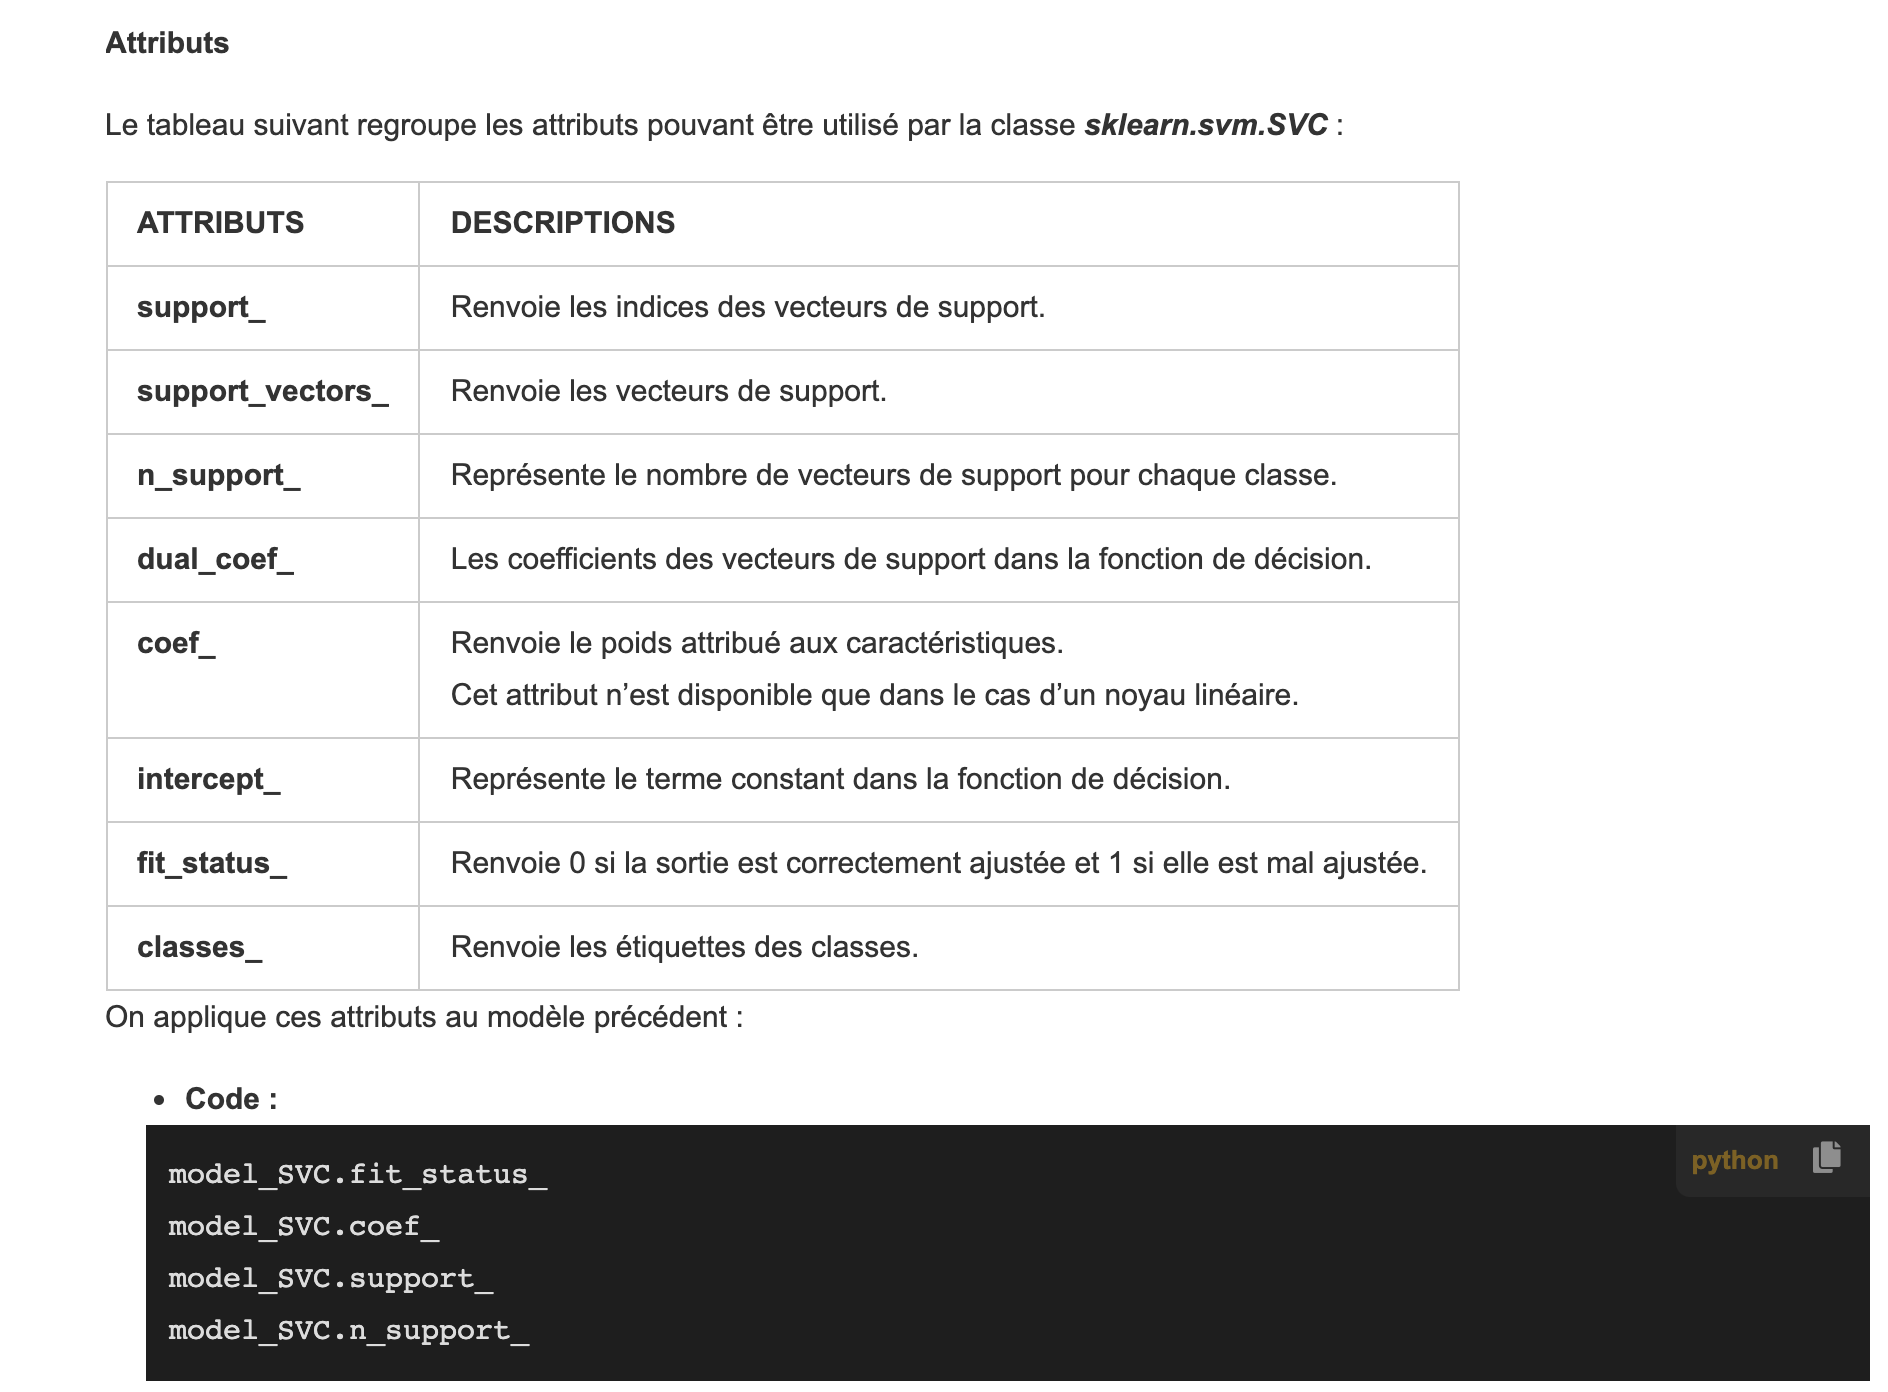

## linearSVC 

**Remarque :**

Le linearSVC n’accepte pas les attributs suivants : support_, support_vectors_,
                            n_support_, fit_status_ et dual_coef_.

    
**#instanciation**
model_linearSVC = LinearSVC( dual = False, random_state = 0, penalty = 'l1', tol = 1e-3)
... predict
...

**Attributs:** model_linearSVC.coef_ , model_linearSVC.intercept_

## <font color='red'> **Visualization**</font> -- <font color='blue'> **LabelEncoder**</font>

In [474]:
#traitement du fichier csv
df = pd.read_csv('iris.csv')
y = df["species"] # target

X = df[["sepal_length", "sepal_width"]]

In [499]:
from sklearn.preprocessing import LabelEncoder
# encode string class values as integers
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)
label_encoded_y[49:55], label_encoded_y[103:105]

(array([0, 1, 1, 1, 1, 1]), array([2, 2]))

In [505]:
group.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
           dtype='int64')

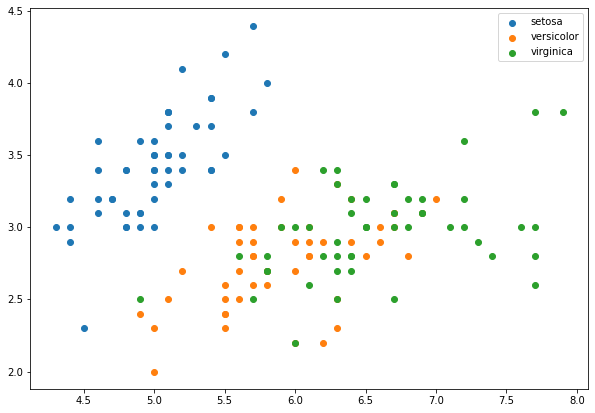

In [512]:
plt.figure(figsize=(10, 7))
for name, group in df.groupby("species"):
    #print(name, group.index)
    plt.scatter(df["sepal_length"][group.index], 
                df["sepal_width"][group.index], label=name)
plt.legend(loc='best');

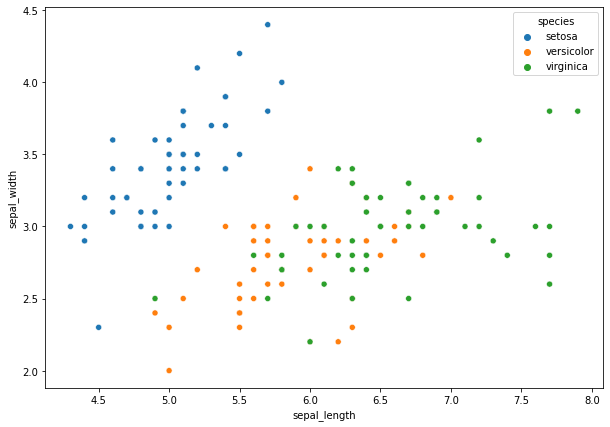

In [482]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="sepal_length", y="sepal_width", hue='species',  data=df );
               #palette=sns.color_palette(["#2ecc71", "#e74c3c"]) )

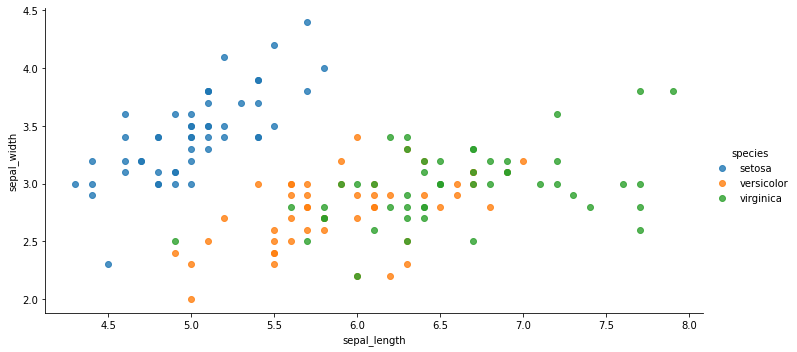

In [513]:
sns.lmplot(x="sepal_length", y="sepal_width", hue='species',  data=df , 
           fit_reg=False, legend=True, aspect= 2)

# Basic DATA & (make_regression > sklearn_datasets)

## SVM regressor

In [215]:
from sklearn.svm import SVR
X = [[12, 12], [20,20]]
y = [1, 2]
#instanciation
model_SVR = SVR( kernel = 'linear' , gamma = 'auto')
#training
model_SVR.fit( X, y)
#Prédiction
model_SVR.predict( [[20,20]])

array([1.9])

**Attributs:** : model_SVR.support_ ,  model_SVR.support_vectors_

model_SVR.n_support_ , model_SVR.dual_coef_ ,  model_SVR.coef_

model_SVR.intercept_ , model_SVR.fit_status_

## LinearSVR

In [216]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
X, y = make_regression( n_features = 3, random_state = 0)
#instanciation
model_linearSVR = LinearSVR( dual = False, random_state = 0,
loss = 'squared_epsilon_insensitive', tol = 1e-5)
#training
model_linearSVR.fit( X, y)
#Prédiction
model_linearSVR.predict( [[0,0,0]])

array([0.05550606])

In [220]:
#instanciation
model_SVR = SVR( kernel = 'linear' , gamma = 'auto')
#training
model_SVR.fit( X, y)
#Prédiction
model_SVR.predict( [[0,0,0]])

array([0.03772166])

**Attributs:** model_linearSVR.coef_ , model_linearSVR.intercept_

## Scores LinearSVR && SVR

In [223]:
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
X, y = make_regression( n_features = 3, random_state = 0)

#fractionner dataset (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#instanciation
model_linearSVR = LinearSVR( dual = False, random_state = 0,
loss = 'squared_epsilon_insensitive', tol = 1e-5)
#training
model_linearSVR.fit( X_train, y_train)

#calcule de précision
print("score LinearSVR: ",  model_linearSVR.score( X_test, y_test))


#instanciation
model_SVR = SVR( kernel = 'linear' , gamma = 'auto')

#training
model_SVR.fit( X_train, y_train)

#calcule de précision
print("score SVR: ",  model_SVR.score( X_test, y_test))


score LinearSVR:  0.9999150716535511
score SVR:  0.890570932614692


# Remarque groupby

In [225]:
dataframe = pd.read_csv('iris.csv')
dataframe.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [226]:
print(dataframe.groupby('petal_length').size())

petal_length
1.0     1
1.1     1
1.2     2
1.3     7
1.4    13
1.5    13
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
dtype: int64


***Visualization***

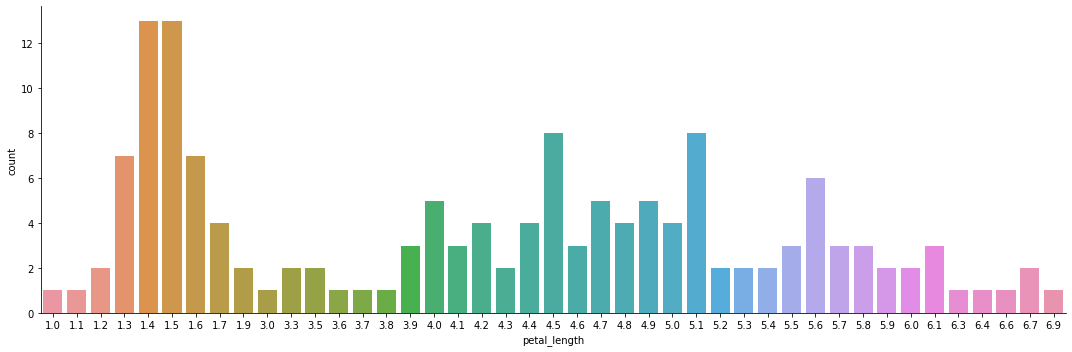

In [234]:
#plt.figure(figsize = (19, 4)) aspect = 3 to make the figure bigger
sns.catplot(x='petal_length', data=dataframe, kind="count", aspect=3);
#sns.factorplot('petal_length',data=dataframe,kind="count", aspect=3);

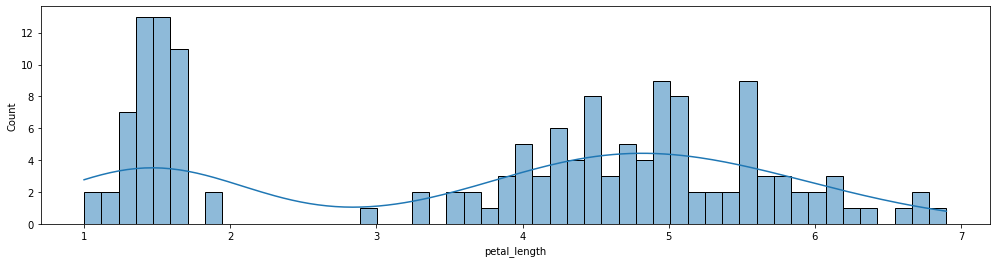

In [235]:
plt.figure(figsize = (17, 4))
sns.histplot(dataframe['petal_length'], kde=True, bins= 50);

In [ ]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Load Data
dfa = pd.read_csv("mall_customers.csv")
dfa = dfa[['Age','Annual Income (k$)']]
print('Total Row : ', len(dfa))

# Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(dfa.astype(float))

## Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
labels = kmeans.labels_

new_dfa = pd.DataFrame(data = dfa_std, columns = ['Age','Annual Income (k$)'])
new_dfa['label_kmeans'] = labels


fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 0], new_dfa["Age"][new_dfa["label_kmeans"] == 0], 
            color = "blue", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 1], new_dfa["Age"][new_dfa["label_kmeans"] == 1], 
            color = "red", s=100, edgecolor='green',linestyle='--')
plt.scatter(new_dfa["Annual Income (k$)"][new_dfa["label_kmeans"] == 2], new_dfa["Age"][new_dfa["label_kmeans"] == 2], 
            color = "green", s=100, edgecolor='green',linestyle='--')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Age')
plt.show()